<a href="https://colab.research.google.com/github/AndiniPrihartiningtias/Game-Sales-Analysis-KNN/blob/main/game_sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assesing Data


In [2]:
df= pd.read_csv ('/content/drive/MyDrive/Sales game/vgsales.csv.zip')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df.head(20)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [5]:
df.shape

(16598, 11)

In [6]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [8]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [9]:
df.isna().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [10]:
df.duplicated().sum()

np.int64(0)

# Cleaning data
1. Isi missing value
2. ubah tipe data

### Missing value
Isi missing value years

1. cek missing value
2. cek pada kolom platform terdapat data unique apa aja
3. isi missing value dengan modus dari per unique value kolom platform

In [11]:
df[df.isna().any(axis=1)].head(15)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
624,625,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0.00,0.21,2.48
649,650,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,Konami Digital Entertainment,2.15,0.18,0.00,0.07,2.39
652,653,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,LucasArts,1.54,0.63,0.00,0.22,2.39
711,713,Call of Duty 3,Wii,NaN,Shooter,Activision,1.19,0.84,0.00,0.23,2.26
782,784,Rock Band,Wii,NaN,Misc,MTV Games,1.35,0.56,0.00,0.20,2.11


In [12]:
df['Platform']. unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [13]:
df.groupby('Platform')[['Year','Publisher']].apply(lambda x: x.isna().sum())

,Year,Publisher
Platform,,
2600,17,0
3DO,0,0
3DS,9,2
DC,0,0
DS,30,7
GB,1,0
GBA,11,26
GC,14,0
GEN,0,0


In [14]:
df['Year']= df.groupby('Platform')['Year'].transform(lambda x: x.fillna(x.mode()[0]))

In [15]:
df.groupby('Platform')['Year'].apply(lambda x: x.isna().sum())

,Year
Platform,
2600,0
3DO,0
3DS,0
DC,0
DS,0
GB,0
GBA,0
GC,0
GEN,0


In [16]:
df['Publisher']= df.groupby('Platform')['Publisher'].transform(lambda x: x.fillna(x.mode()[0]))

In [17]:
df.groupby('Platform')['Publisher']. apply(lambda x : x.isna().sum())

,Publisher
Platform,
2600,0
3DO,0
3DS,0
DC,0
DS,0
GB,0
GBA,0
GC,0
GEN,0


In [18]:
df.isna().sum()

,0
Rank,0
Name,0
Platform,0
Year,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


### Mengubah Type Data
mengubah type data Year dari Float ke Int

In [19]:
df['Year']= df['Year'].astype('int64')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  int64  
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


#Pertanyaan Bisnis
1. game apa yang paling laku dan tidak laku di NA?
2. Game apa yang paling laku dan tidak laku di EU?
3. Game apa yang paling laku dan tidak laku di JP?
4. Negara mana yang penjualannya mendongkrak penjualan goblal?
5. Bagaimana korelasi penjualan game di tiap tiap negara bagian?
6. Di tahun berapa penjualan gobal game naik pesat dan turun (rank berdasarkan tahun) ?
7. Secara global platform apa yang mendongkrak dunia game?
8. Genre Apa yang memiliki minat paling besar secara global?
9. Dari data tersebut apa yang membuat suatu game mendapatkan sales yang besar?

#Exploration Data

In [21]:
df.describe(include='all')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598,16598,16598.000000,16598,16598,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
unique,NaN,11493,31,NaN,12,578,NaN,NaN,NaN,NaN,NaN
top,NaN,Need for Speed: Most Wanted,DS,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN
freq,NaN,12,2163,NaN,3316,1364,NaN,NaN,NaN,NaN,NaN
mean,8300.605254,NaN,NaN,2006.386071,NaN,NaN,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,NaN,NaN,5.859628,NaN,NaN,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.040000,0.470000


1. Membuat tabel sales NA,EU,dan JP
2. Membuat tabel Rank sales berdasarkan Year
3. Membuat tabel Rank sales berdasarka Platform

##Tabel sales NA

In [22]:
Table_Sales_NA = df[['Rank', 'Name', 'Platform','Year', 'Genre', 'Publisher', 'NA_Sales']].sort_values(by='NA_Sales', ascending= False)
Table_Sales_NA.reset_index(drop= True, inplace=True )
Table_Sales_NA['Rank']= Table_Sales_NA. index+1
display(Table_Sales_NA.head(10))


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08
2,3,Duck Hunt,NES,1984,Shooter,Nintendo,26.93
3,4,Tetris,GB,1989,Puzzle,Nintendo,23.20
4,5,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85
5,6,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75
6,7,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97
7,8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59
8,9,Wii Play,Wii,2006,Misc,Nintendo,14.03
9,10,Super Mario World,SNES,1990,Platform,Nintendo,12.78


In [23]:
Table_Sales_NA.describe()

,Rank,Year,NA_Sales
count,16598.000000,16598.000000,16598.000000
mean,8299.500000,2006.386071,0.264667
std,4791.574219,5.859628,0.816683
min,1.000000,1980.000000,0.000000
25%,4150.250000,2003.000000,0.000000
50%,8299.500000,2007.000000,0.080000
75%,12448.750000,2010.000000,0.240000
max,16598.000000,2020.000000,41.490000


In [24]:
Table_Sales_NA= df['NA_Sales'].sum()
print('Total NA Sales:', Table_Sales_NA)

Total NA Sales: 4392.950000000001


##Table Sales EU

In [25]:
Table_Sales_EU= df[['Rank','Name','Platform','Genre','Publisher','EU_Sales']].sort_values(by='EU_Sales',ascending= False)
Table_Sales_EU. reset_index ( drop= True, inplace= True )
Table_Sales_EU ['Rank'] = Table_Sales_EU. index+1
display(Table_Sales_EU.head(5))

,Rank,Name,Platform,Genre,Publisher,EU_Sales
0,1,Wii Sports,Wii,Sports,Nintendo,29.02
1,2,Mario Kart Wii,Wii,Racing,Nintendo,12.88
2,3,Wii Sports Resort,Wii,Sports,Nintendo,11.01
3,4,Nintendogs,DS,Simulation,Nintendo,11.00
4,5,Grand Theft Auto V,PS3,Action,Take-Two Interactive,9.27


In [26]:
Table_Sales_EU.describe()

,Rank,EU_Sales
count,16598.000000,16598.000000
mean,8299.500000,0.146652
std,4791.574219,0.505351
min,1.000000,0.000000
25%,4150.250000,0.000000
50%,8299.500000,0.020000
75%,12448.750000,0.110000
max,16598.000000,29.020000


In [27]:
Table_Sales_EU = df['EU_Sales'].sum()
print('Total EU Sales:', Table_Sales_EU)

Total EU Sales: 2434.1299999999997


##Table Sales JP

In [28]:
Table_Sales_JP= df[['Rank', 'Name', 'Platform', 'Genre', 'Publisher','JP_Sales']].sort_values(by= 'JP_Sales', ascending= False)
Table_Sales_JP. reset_index( drop = True, inplace= True)
Table_Sales_JP ['Rank']= Table_Sales_JP. index+1
display(Table_Sales_JP.head(5))

,Rank,Name,Platform,Genre,Publisher,JP_Sales
0,1,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,10.22
1,2,Pokemon Gold/Pokemon Silver,GB,Role-Playing,Nintendo,7.20
2,3,Super Mario Bros.,NES,Platform,Nintendo,6.81
3,4,New Super Mario Bros.,DS,Platform,Nintendo,6.50
4,5,Pokemon Diamond/Pokemon Pearl,DS,Role-Playing,Nintendo,6.04


In [29]:
Table_Sales_JP.describe()

,Rank,JP_Sales
count,16598.000000,16598.000000
mean,8299.500000,0.077782
std,4791.574219,0.309291
min,1.000000,0.000000
25%,4150.250000,0.000000
50%,8299.500000,0.000000
75%,12448.750000,0.040000
max,16598.000000,10.220000


In [30]:
Table_Sales_JP= df['JP_Sales'].sum()
print('Total JP Sales:', Table_Sales_JP)

Total JP Sales: 1291.0200000000002


##Table Sales by Year

In [31]:
Sales_by_Year= df.groupby('Year')[['NA_Sales', 'EU_Sales','JP_Sales','Other_Sales', 'Global_Sales']].sum().reset_index().sort_values(by= 'Year', ascending= False)
Sales_by_Year= Sales_by_Year.reset_index(drop= True)
display(Sales_by_Year.head())

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2020,0.27,0.00,0.00,0.02,0.29
1,2017,0.00,0.00,0.05,0.00,0.05
2,2016,22.66,26.76,13.70,7.75,70.93
3,2015,102.95,97.77,33.79,30.05,264.74
4,2014,131.97,125.65,39.46,40.02,337.05


##Table Sales by Platform

In [32]:
Sales_by_Platform= df.groupby('Platform')[['NA_Sales', 'EU_Sales','JP_Sales','Other_Sales', 'Global_Sales']].sum().sort_values(by= 'Global_Sales', ascending= False)

display(Sales_by_Platform.head())

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,
PS2,583.84,339.29,139.20,193.44,1255.64
X360,601.05,280.58,12.43,85.54,979.96
PS3,392.26,343.71,79.99,141.93,957.84
Wii,507.71,268.38,69.35,80.61,926.71
DS,390.71,194.65,175.57,60.53,822.49


## Rank Sales

In [33]:
Rank_Sales= df[['Rank', 'Global_Sales']].sort_values(by='Global_Sales', ascending = False)
display(Rank_Sales.head())

,Rank,Global_Sales
0,1,82.74
1,2,40.24
2,3,35.82
3,4,33.00
4,5,31.37


##Table_Genre

In [34]:
Table_Genre= df.groupby ('Genre')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].sum().sort_values(by='Global_Sales', ascending= False)
Table_Genre.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,877.83,525.00,159.95,187.38,1751.18
Sports,683.35,376.85,135.37,134.97,1330.93
Shooter,582.60,313.27,38.28,102.69,1037.37
Role-Playing,327.28,188.06,352.31,59.61,927.37
Platform,447.05,201.63,130.77,51.59,831.37


##Table Publisher Sales


In [35]:
Table_Publisher_Sales= (df.groupby('Publisher')
                        .agg(Total_Game =('Name', 'count'),
                              Global_Sales=('Global_Sales','sum')
                             )
                        .sort_values(by='Global_Sales', ascending= False)
                        .reset_index()
                        .reset_index(drop= True)
)
display(Table_Publisher_Sales.head())


,Publisher,Total_Game,Global_Sales
0,Nintendo,703,1786.56
1,Electronic Arts,1364,1111.30
2,Activision,975,727.46
3,Sony Computer Entertainment,688,612.30
4,Ubisoft,929,475.37


# Visualisasi


##Pertanyaan 1
### Game apa yang paling laku dan tidak laku di NA?

In [36]:
Platform_Sales_NA = ( df.groupby('Platform')[['NA_Sales']].sum()
                     .sort_values(by= 'NA_Sales', ascending= False)
                     .reset_index()
)

display(Platform_Sales_NA.head())

,Platform,NA_Sales
0,X360,601.05
1,PS2,583.84
2,Wii,507.71
3,PS3,392.26
4,DS,390.71


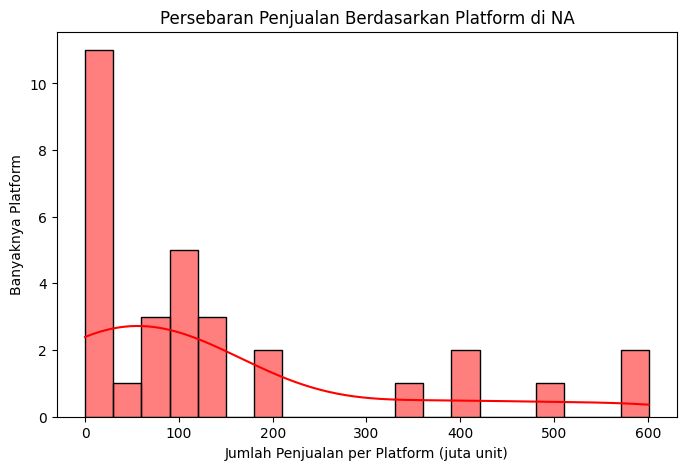

In [37]:
plt.figure(figsize= (8,5)) #SALAH
sns.histplot(data= Platform_Sales_NA,
             x= 'NA_Sales',
             bins=20 ,
             kde= True,
             color= 'red')
plt.title ('Persebaran Penjualan Berdasarkan Platform di NA')
plt. xlabel ('Jumlah Penjualan per Platform (juta unit)')
plt. ylabel ('Banyaknya Platform')
plt.show()

In [38]:
Year_Sales_NA= (df.groupby('Year')[['NA_Sales']].sum()
                .sort_values(by= 'NA_Sales', ascending= False)
                .reset_index()

)
display(Year_Sales_NA.head())

,Year,NA_Sales
0,2008,353.59
1,2009,349.19
2,2007,312.05
3,2010,304.24
4,2006,265.02


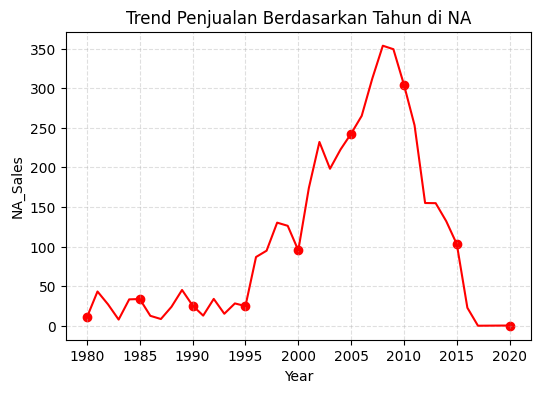

In [39]:
plt.figure (figsize= (6,4))
sns.lineplot(data= Year_Sales_NA,
             x= 'Year',
             y= 'NA_Sales',
             color= "red")
Sampled_data= Year_Sales_NA[Year_Sales_NA ['Year'] % 5 == 0]
plt.scatter(
    Sampled_data ['Year'],
    Sampled_data ['NA_Sales'],
    color= 'red'
)
plt.grid(True, linestyle= '--',alpha= 0.4)
plt.title ('Trend Penjualan Berdasarkan Tahun di NA')
plt.show()


In [40]:
Publisher_Sales_NA = (df.groupby('Publisher')[['NA_Sales']].sum()
                      .sort_values(by= 'NA_Sales', ascending=False)
                      .reset_index()
)
display(Publisher_Sales_NA.head())

,Publisher,NA_Sales
0,Nintendo,816.87
1,Electronic Arts,595.14
2,Activision,429.70
3,Sony Computer Entertainment,267.75
4,Ubisoft,253.62


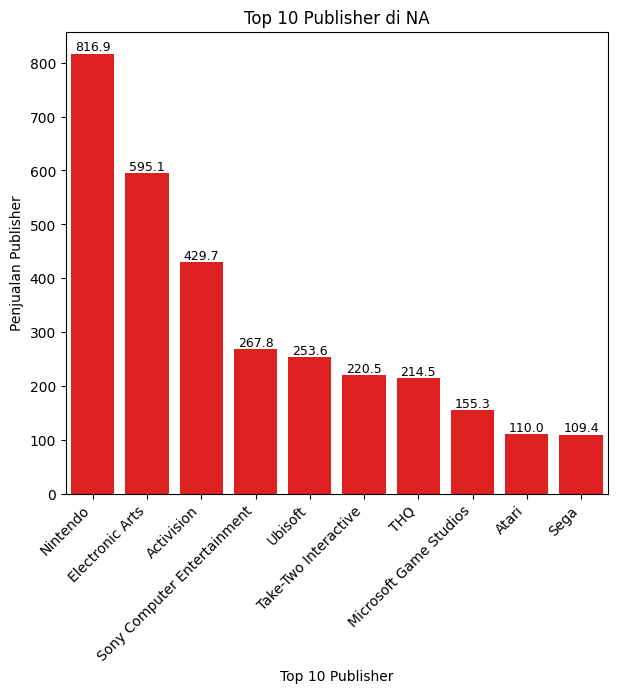

In [41]:
plt.figure(figsize=(7,6))
sns.barplot(data= Publisher_Sales_NA.head(10).sort_values(by= 'NA_Sales', ascending=False),
            x= 'Publisher',
            y= 'NA_Sales',
            color= 'red')
for p in plt.gca().patches:
  plt.text (p.get_x() + p.get_width()/2,  # posisi horizontal (tengah batang)
        p.get_height(),                   # posisi vertikal (tinggi batang)
        f'{p.get_height():.1f}',          # teks angka
        ha='center', va='bottom',         # rata tengah & di atas batang
        fontsize=9)

plt.title('Top 10 Publisher di NA')
plt.xlabel('Top 10 Publisher')
plt.ylabel('Penjualan Publisher')
plt.xticks(rotation= 45, ha= 'right')
plt.show()

##Pertanyaan 2
Game apa yang paling laku dan tidak laku di EU?


In [42]:
Platform_Sales_EU = (df.groupby('Platform')[['EU_Sales']].sum()
.sort_values(by='EU_Sales', ascending= False)
.reset_index()
)
display(Platform_Sales_EU.head())

,Platform,EU_Sales
0,PS3,343.71
1,PS2,339.29
2,X360,280.58
3,Wii,268.38
4,PS,213.60


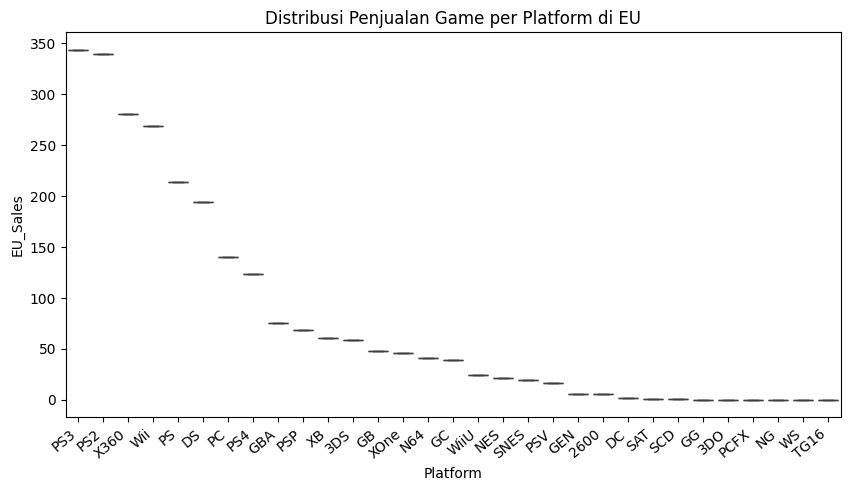

In [43]:
plt.figure(figsize=(10,5))
sns.boxplot( x= 'Platform', y= 'EU_Sales', data= Platform_Sales_EU)
plt.title('Distribusi Penjualan Game per Platform di EU')
plt.xticks(rotation= 40, ha= 'right')
plt.show()

In [44]:
Year_Sales_EU=(df.groupby('Year')[['EU_Sales']].sum()
               .reset_index()
               .sort_values(by= 'EU_Sales', ascending= False)
               .reset_index(drop= True)
               )
display(Year_Sales_EU.head())

,Year,EU_Sales
0,2009,195.62
1,2008,184.98
2,2010,176.73
3,2011,175.51
4,2007,160.50


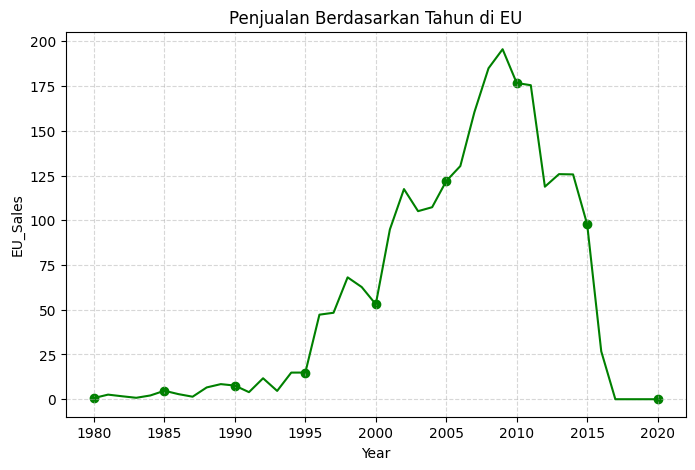

In [45]:
plt.figure(figsize=(8,5))
sns.lineplot(data= Year_Sales_EU, x= 'Year', y= 'EU_Sales',color= 'green')
Marker_Data= Year_Sales_EU [ Year_Sales_EU['Year'] %5 ==0]
plt.scatter(
    Marker_Data ['Year'],
    Marker_Data ['EU_Sales'],
    color= 'green'
           )
plt.title('Penjualan Berdasarkan Tahun di EU')
plt.grid(True, linestyle= '--', alpha= 0.5)
plt.show()

In [46]:
Sales_Publisher_EU = df.groupby('Publisher')[['EU_Sales']].sum().reset_index().sort_values(by = 'EU_Sales', ascending= False).reset_index(drop= True)
display(Sales_Publisher_EU)

,Publisher,EU_Sales
0,Nintendo,418.74
1,Electronic Arts,372.09
2,Activision,215.53
3,Sony Computer Entertainment,189.40
4,Ubisoft,163.39
...,...,...
573,id Software,0.00
574,ASCII Media Works,0.00
575,fonfun,0.00
576,dramatic create,0.00


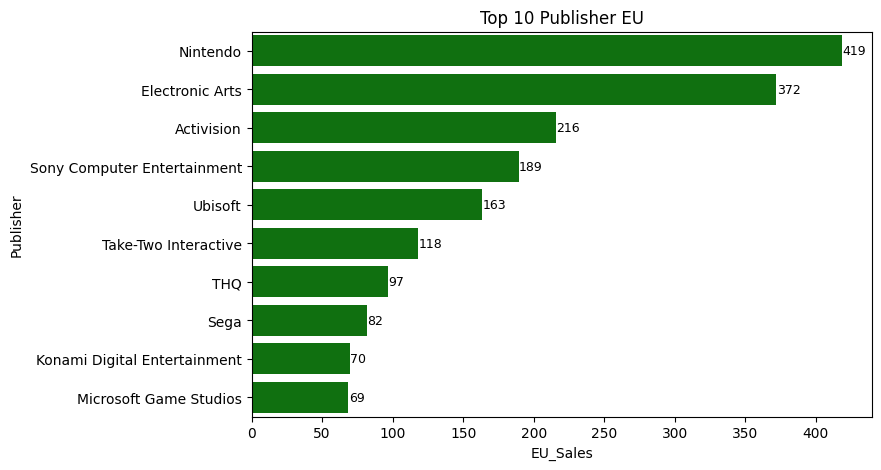

In [47]:
plt.figure(figsize=(8,5))
sns.barplot(data= Sales_Publisher_EU.head(10).sort_values(by= 'EU_Sales', ascending= False),
            x= 'EU_Sales',
            y= 'Publisher',
            color= 'green'
          )
for p in plt.gca().patches:
  plt.text( p.get_width()+ 0.2,
            p.get_y()+ p.get_height()/2,
            f'{p.get_width():.0f}',
            ha= 'left', va= 'center',
            fontsize= 9
  )
plt.title('Top 10 Publisher EU')
plt.show()



##Pertanyaan 3
Game apa yang paling laku dan tidak laku di JP?

In [48]:
Sales_Platform_JP = (df.groupby('Platform')[['JP_Sales']]
                     .sum()
                     .reset_index()
                     .sort_values(by= 'JP_Sales', ascending= False)
                     .reset_index(drop= True)
)
display(Sales_Platform_JP.head())

,Platform,JP_Sales
0,DS,175.57
1,PS,139.82
2,PS2,139.20
3,SNES,116.55
4,NES,98.65


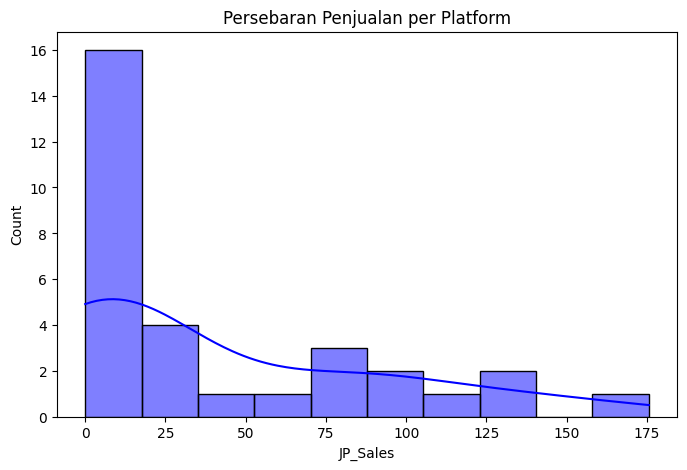

In [49]:
plt.figure(figsize=(8,5))
sns.histplot(data= Sales_Platform_JP, x= 'JP_Sales',color= 'blue', kde= True, bins= 10)
plt.title('Persebaran Penjualan per Platform')
plt.show()

In [50]:
Sales_Year_JP = ( df.groupby('Year')[['JP_Sales']]
                 .sum()
                 .reset_index()
                 .sort_values( by= 'JP_Sales', ascending= False)
                 .reset_index( drop= True)
)
display(Sales_Year_JP.head())

,Year,JP_Sales
0,2006,74.63
1,2009,62.96
2,2008,60.81
3,2007,60.29
4,2010,59.49


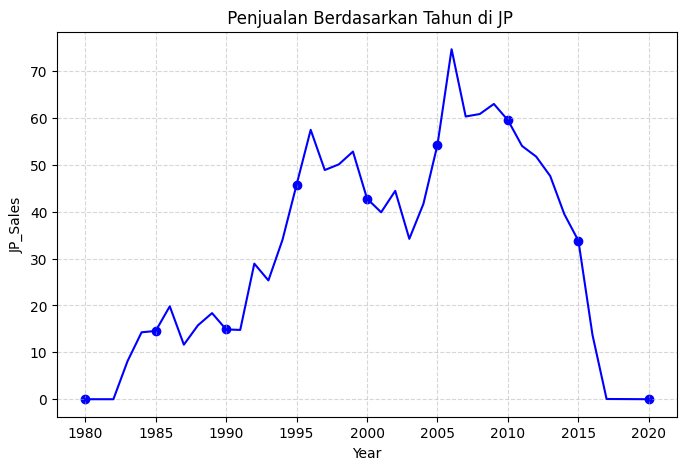

In [51]:
plt.figure( figsize=(8,5))
sns.lineplot( data= Sales_Year_JP, x= 'Year', y= 'JP_Sales', color= 'Blue')
Marker_Data_JP = Sales_Year_JP [Sales_Year_JP ['Year']% 5 == 0]
plt.scatter (
    Marker_Data_JP ['Year'],
    Marker_Data_JP ['JP_Sales'],
    color= 'Blue'
)
plt.title(' Penjualan Berdasarkan Tahun di JP')
plt.grid( True, linestyle= '--', alpha= 0.5)
plt.show()


In [52]:
Sales_Publisher_JP = (df.groupby('Publisher')[['JP_Sales']]
                      .sum()
                      .reset_index()
                      .sort_values( by='JP_Sales', ascending = False)
                      .reset_index( drop= True)
)
display (Sales_Publisher_JP.head())

,Publisher,JP_Sales
0,Nintendo,455.42
1,Namco Bandai Games,127.24
2,Konami Digital Entertainment,91.30
3,Sony Computer Entertainment,74.14
4,Capcom,68.08


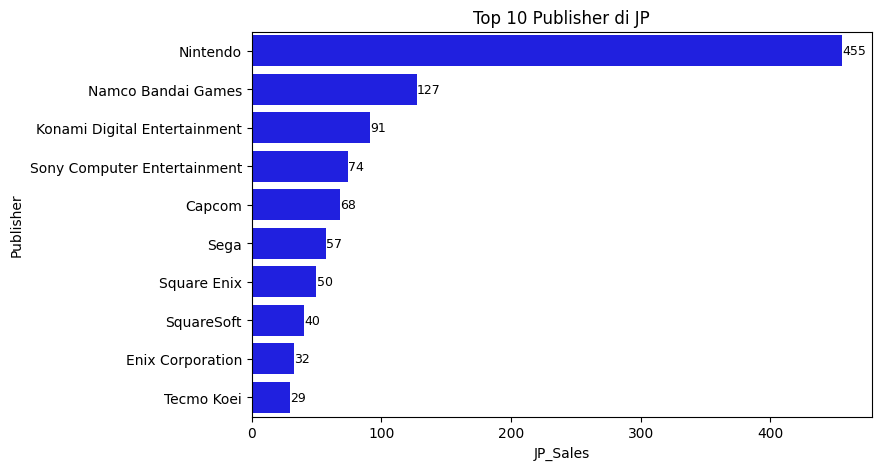

In [53]:
plt.figure(figsize=(8,5))
sns.barplot( data= Sales_Publisher_JP.head(10), x= 'JP_Sales', y= 'Publisher', color = 'Blue')
for p in plt.gca(). patches:
  plt.text ( p.get_width()+ 0.2,
            p.get_y()+ p.get_height()/2,
             f'{p.get_width():.0f}',
             ha= 'left',
             va='center',
             fontsize= 9
  )
plt.title('Top 10 Publisher di JP')
plt.show()



## Pertanyaan 4
Negara mana yang penjualannya mendongkrak penjualan goblal?

In [54]:
Table_Sales_Per_Negara= df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum().reset_index()
Table_Sales_Per_Negara.columns= ['Region','Total_Sales']
display(Table_Sales_Per_Negara)

,Region,Total_Sales
0,NA_Sales,4392.95
1,EU_Sales,2434.13
2,JP_Sales,1291.02
3,Other_Sales,797.75


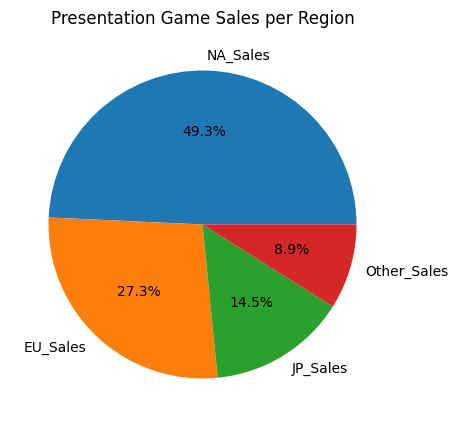

In [55]:
plt.figure(figsize=(5,5))
plt.pie( Table_Sales_Per_Negara['Total_Sales'], labels= Table_Sales_Per_Negara['Region'],autopct='%1.1f%%')
plt.title('Presentation Game Sales per Region')
plt.show()

##Pertanyaan 5
Bagaimana korelasi penjualan game di tiap tiap negara bagian?

In [56]:
corr_Sales= df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].corr()
display (corr_Sales)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
NA_Sales,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,0.941047,0.902836,0.611816,0.748331,1.000000


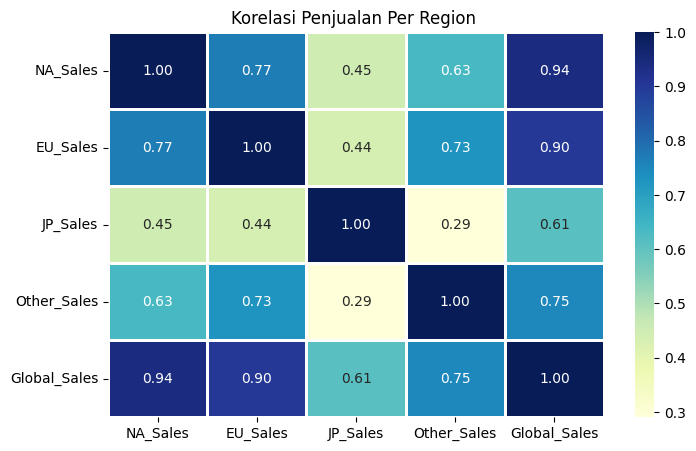

In [57]:
plt.figure(figsize=(8,5))
sns.heatmap(corr_Sales,
            fmt= '.2f',
            cmap= 'YlGnBu',
            annot= True,
            linewidths= 1,
            linecolor='white',
            )
plt.title('Korelasi Penjualan Per Region ')
plt.tight_layout=()
plt.show()

##Pertanyaan 6
Di tahun berapa penjualan gobal game naik pesat dan turun (rank berdasarkan tahun) ?

In [58]:
Sales_Year_Global = (df.groupby('Year')[['Global_Sales']]
                     .sum()
                     .reset_index()
                     .sort_values(by= 'Global_Sales', ascending= False)
                     .reset_index( drop= True)
)
display(Sales_Year_Global.head())

,Year,Global_Sales
0,2009,684.20
1,2008,682.43
2,2007,611.13
3,2010,600.45
4,2011,539.78


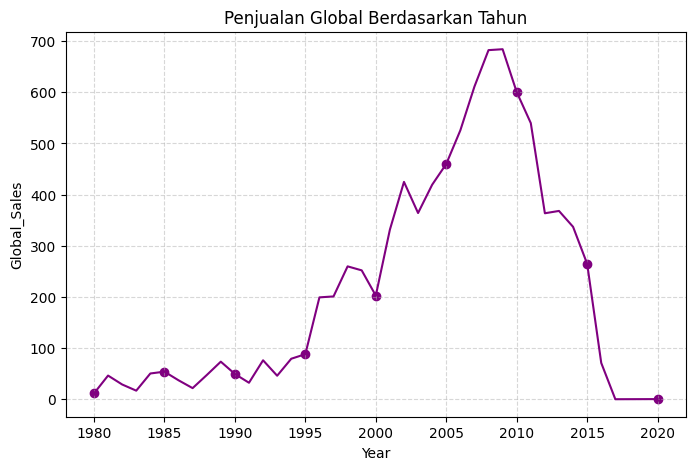

In [59]:
from matplotlib.lines import lineStyles
plt.figure(figsize=(8,5))
sns.lineplot( data= Sales_Year_Global, x = 'Year', y = 'Global_Sales', color = 'Purple')
Marker_Data_Global= Sales_Year_Global[Sales_Year_Global['Year']% 5 == 0]
plt.scatter(
    Marker_Data_Global ['Year'],
    Marker_Data_Global['Global_Sales'],
    color ='Purple'
)
plt.title( 'Penjualan Global Berdasarkan Tahun')
plt.grid( True, linestyle= '--', alpha= 0.5)
plt.tight_layout=()
plt.show()

##Pertanyaan 7
Secara global platform apa yang mendongkrak dunia game?

In [60]:
Sales_Platform_Global = (df.groupby('Platform')[['Global_Sales']]
                         .sum()
                         . reset_index()
                         .sort_values(by= 'Global_Sales', ascending = False)
                         .reset_index( drop= True)
)
display(Sales_Platform_Global.head())

,Platform,Global_Sales
0,PS2,1255.64
1,X360,979.96
2,PS3,957.84
3,Wii,926.71
4,DS,822.49


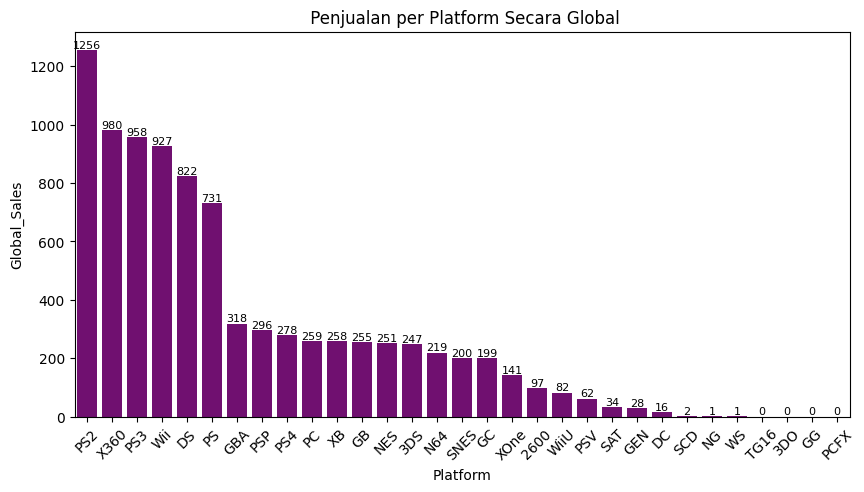

In [61]:
plt.figure(figsize=(10,5))
sns.barplot( data = Sales_Platform_Global, x= 'Platform', y= 'Global_Sales', color= 'purple')
for p in plt.gca().patches:
  plt.text( p.get_x() + p.get_width()/2,
            p.get_height(),
            f'{p.get_height():.0f}',
            ha= 'center',
            va= 'bottom',
            size= 8
  )
plt.xticks( rotation= 45, ha= 'center')
plt.title( ' Penjualan per Platform Secara Global')
plt.show()

## Pertanyaan 8
Genre Apa yang memiliki minat paling besar secara global?

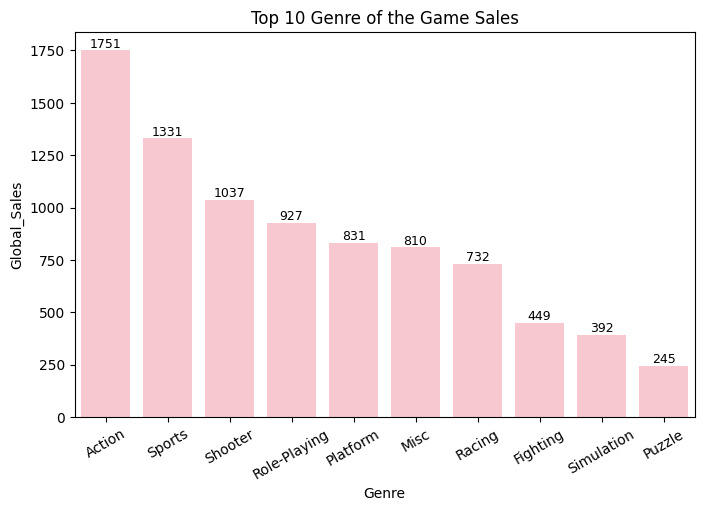

In [62]:
plt.figure(figsize= (8,5))
sns.barplot( data= Table_Genre.head(10), x= 'Genre', y= 'Global_Sales', color='pink')
for p in plt.gca(). patches:
  plt.text( p.get_x() + p.get_width()/2,
            p.get_height(),
            f'{p.get_height():.0f}',
            ha='center',
            va='bottom',
            size=9
  )
plt.xticks( rotation= 30, ha= 'center')
plt.title('Top 10 Genre of the Game Sales')
plt.show()

## Pertanyaan 9
 Dari data tersebut apa yang membuat suatu game mendapatkan sales yang besar?

In [63]:
from sklearn.preprocessing import LabelEncoder

data_corr = df[['Platform', 'Publisher', 'Genre', 'Year', 'Global_Sales']].copy()
le = LabelEncoder()
for col in ['Platform', 'Publisher', 'Genre']:
    data_corr[col] = le.fit_transform(data_corr[col])
corr = data_corr.corr()

print(corr)

              Platform  Publisher     Genre      Year  Global_Sales
Platform      1.000000  -0.017408  0.029061  0.174262      0.028213
Publisher    -0.017408   1.000000 -0.052728  0.032398      0.016734
Genre         0.029061  -0.052728  1.000000 -0.120658      0.021671
Year          0.174262   0.032398 -0.120658  1.000000     -0.074395
Global_Sales  0.028213   0.016734  0.021671 -0.074395      1.000000


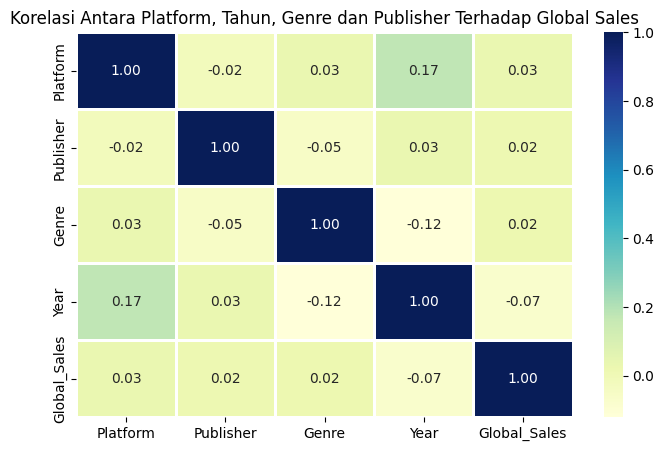

In [64]:
plt.figure(figsize=(8,5))
sns.heatmap( data= corr,
            fmt ='.2f',
            cmap='YlGnBu',
            annot= True,
            linewidths=1,
            linecolor='white'
            )
plt.title('Korelasi Antara Platform, Tahun, Genre dan Publisher Terhadap Global Sales')
plt.show()

#Supervised Learning

## KNN Classification High and Low Sales

In [110]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



In [66]:
df['Sales_Label']= df['Global_Sales'].apply(lambda x : 'High' if x> 1.0 else 'Low')

In [104]:
df[['Global_Sales', 'Sales_Label']].head()

,Global_Sales,Sales_Label
0,82.74,High
1,40.24,High
2,35.82,High
3,33.00,High
4,31.37,High


In [103]:
df['Sales_Label'].value_counts()

,count
Sales_Label,
Low,14544
High,2054


In [69]:
X = df[['NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales']]
y = df['Sales_Label']


###Train_Test_Split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size= 0.2, random_state= 42)

###Normalisasi

In [71]:
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test= scaler.transform(X_test)

# Normalisasi menyamakan skala agar tdk ada nilai dominan
# Tetapi tidak semua data akan menghasilkan skala yang rata kalau data tidak konsisten dan terdapat std yang jomplang
# maka hasil normalisasi bisa memiliki angka yang besar dan angka kecil

### Parameter RandomSearch

In [72]:
param_dist_knn={
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance'],
    'p' : [1,2]
}


In [73]:
Model_Knn = KNeighborsClassifier()

### Randomized Search CV

In [74]:
Random_Knn = RandomizedSearchCV(
    Model_Knn,
    param_dist_knn,
    n_iter= 20,
    cv= 5,
    scoring= 'accuracy',
    random_state= 42)


In [85]:
Random_Knn.fit( X_scaled_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=20,
                   param_distributions={'n_neighbors': range(1, 21),
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='accuracy')

In [86]:
print(Random_Knn.best_params_)

{'weights': 'distance', 'p': 2, 'n_neighbors': 8}


###Confussion Matrix

In [107]:
y_pred = Random_Knn.predict(X_scaled_test)
cm= confusion_matrix( y_test, y_pred)
print(cm)

[[ 396    3]
 [   7 2914]]


###Classification Report

In [108]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        High       0.98      0.99      0.99       399
         Low       1.00      1.00      1.00      2921

    accuracy                           1.00      3320
   macro avg       0.99      1.00      0.99      3320
weighted avg       1.00      1.00      1.00      3320



###Visualisasi

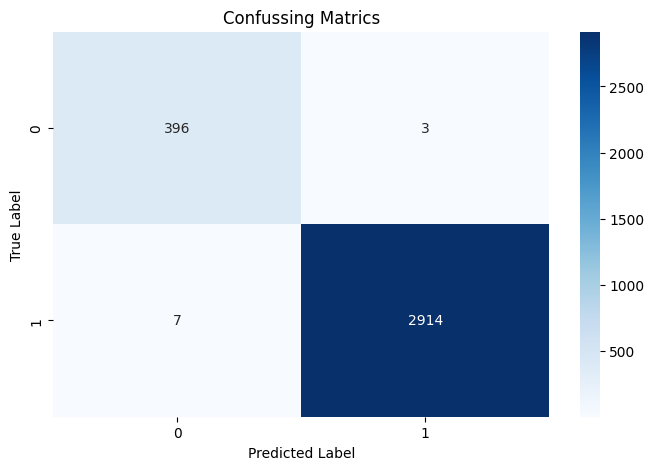

In [109]:
plt.figure(figsize= (8,5))
sns.heatmap(
    data= cm,
    annot= True,
    cmap= 'Blues',
    fmt= 'd'
    )
plt.title('Confussing Matrics')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()